# Using Python for Research Homework: Week 4, Case Study 2

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset.

In [41]:
# DO NOT EDIT THIS CODE
import pandas as pd
import numpy as np
birddata = pd.read_csv("https://courses.edx.org/asset-v1:HarvardX+PH526x+2T2019+type@asset+block@bird_tracking.csv", index_col=0)
birddata.head()

from datetime import date

### Exercise 1

In this case study, we will continue taking a look at patterns of flight for each of the three birds in our dataset. We will group the flight patterns by bird and date, and plot the mean altitude for these groupings.

`pandas` makes it easy to perform basic operations on groups within a dataframe without needing to loop through each value in the dataframe. In this exercise, we will group the dataframe by `birdname` and then find the average `speed_2d` for each bird.

#### Instructions 
- Fill in the code to find the mean altitudes of each bird using the pre-loaded `birddata` dataframe. 

In [90]:
# First, use `groupby()` to group the data by "bird_name".
grouped_birds = birddata.groupby(['bird_name'])

# Now calculate the mean of `speed_2d` using the `mean()` function.
mean_speeds = birddata['speed_2d'].mean()
print('The mean speed of all birds =', mean_speeds, '\n')

mean_speed_for_each_bird = grouped_birds['speed_2d'].mean()
print('Mean Speed For Each Bird:', '\n\n', mean_speed_for_each_bird)

print('\n\n')
# Find the mean `altitude` for each bird.
mean_altitudes = grouped_birds['altitude'].mean()
print('Mean Altitude For Each Bird:', '\n\n', mean_altitudes)

The mean speed of all birds = 2.558986595840664 

Mean Speed For Each Bird: 

 bird_name
Eric     2.300545
Nico     2.908726
Sanne    2.450434
Name: speed_2d, dtype: float64



Mean Altitude For Each Bird: 

 bird_name
Eric     60.249406
Nico     67.900478
Sanne    29.159922
Name: altitude, dtype: float64


### Exercise 2

In this exercise, we will group the flight times by date and calculate the mean altitude within that day.

#### Instructions 
- Convert `birddata.date_time` to the `pd.datetime` format, and store as `birddata["date"]`.
- Fill in the code to find the mean altitudes for each day.

In [259]:
# Convert birddata.date_time to the `pd.datetime` format.
birddata.date_time = pd.to_datetime(birddata['date_time'])


# Create a new column of day of observation
birddata["date"] = birddata['date_time'].dt.date

# Use `groupby()` to group the data by date.
grouped_bydates = birddata.groupby(['date'])

# Find the mean `altitude` for each date.
mean_altitudes_perday = grouped_bydates['altitude'].mean()
# print('Mean Altitudes Per Day', '\n\n', mean_altitudes_perday)

grouped_bydates['altitude'].mean()[28:30]

date
2013-09-12    75.646091
2013-09-13    66.615079
Name: altitude, dtype: float64

### Exercise 3

In this exercise, we will group the flight times by both bird and date, and calculate the mean altitude for each.

#### Instructions 
- `birddata` already contains the `date` column. To find the average speed for each bird and day, create a new grouped dataframe called `grouped_birdday` that groups the data by both `bird_name` and date.

In [267]:
# Use `groupby()` to group the data by bird and date.
grouped_birdday = birddata.groupby(['bird_name','date'])

# Find the mean `altitude` for each bird and date.
mean_altitudes_perday = grouped_birdday['altitude'].mean()
mean_altitudes_perday
mean_altitudes_perday.loc['Eric']

date
2013-08-15     74.988095
2013-08-16    127.773810
2013-08-17    125.890244
2013-08-18    121.353659
2013-08-19    134.928571
                 ...    
2014-04-26     20.717391
2014-04-27     48.790698
2014-04-28     27.829787
2014-04-29     17.425532
2014-04-30     38.791667
Name: altitude, Length: 252, dtype: float64

### Exercise 4

Great! Now find the average speed for each bird and day.

#### Instructions 

- Store these are three `pandas` `Series` objects, one for each bird.
- Use the plotting code provided to plot the average speeds for each bird.

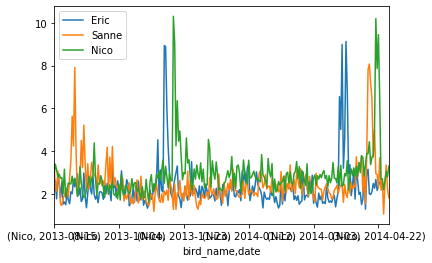

In [168]:
import matplotlib.pyplot as plt

eric_daily_speed  = grouped_birdday.mean().loc[['Eric']]['speed_2d']
sanne_daily_speed = grouped_birdday.mean().loc[['Sanne']]['speed_2d']
nico_daily_speed  = grouped_birdday.mean().loc[['Nico']]['speed_2d']

eric_daily_speed.plot(label="Eric")
sanne_daily_speed.plot(label="Sanne")
nico_daily_speed.plot(label="Nico")
plt.legend(loc="upper left")
plt.show()





In [265]:
print(nico_daily_speed)
nico_daily_speed['date' == '2014-04-04']

bird_name  date      
Nico       2013-08-15    2.856924
           2013-08-16    3.386387
           2013-08-17    3.123210
           2013-08-18    2.785776
           2013-08-19    2.920577
                           ...   
           2014-04-26    2.192028
           2014-04-27    2.582072
           2014-04-28    3.055051
           2014-04-29    2.793232
           2014-04-30    3.297032
Name: speed_2d, Length: 259, dtype: float64


2.8569236190576137